<a href="https://colab.research.google.com/github/ua-datalab/Workshops/blob/main/Streamlit/StreamlitTutorial_GoogleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing libraries

In [ ]:
# %%capture
!pip install streamlit
!pip install plotly
!pip install spacy-streamlit
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00
2023-12-05 18:19:16.946669: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-05 18:19:16.946737: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-05 18:19:16.946772: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBL

In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 3.608s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


## A small Streamlit Demo

In [ ]:
%%writefile app.py
import streamlit as st
st.write('Hello, *World!* :sunglasses:')

Overwriting app.py


## How to run streamlit application?

In [ ]:
!streamlit run app.py &> logs.txt &
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com


34.16.169.90
npx: installed 22 in 3.254s
your url is: https://wide-shoes-guess.loca.lt


This codeblock will generate a few lines of text. The first line is an IP address, the third line is a url generated by localtunnel for opening a webpage. In order to view the Streamlit application in your browser, simply:

1. click on the url generated by the previous codeblock to open it
2. In the textbox 'Endpoint IP', enter the IP address generated above.
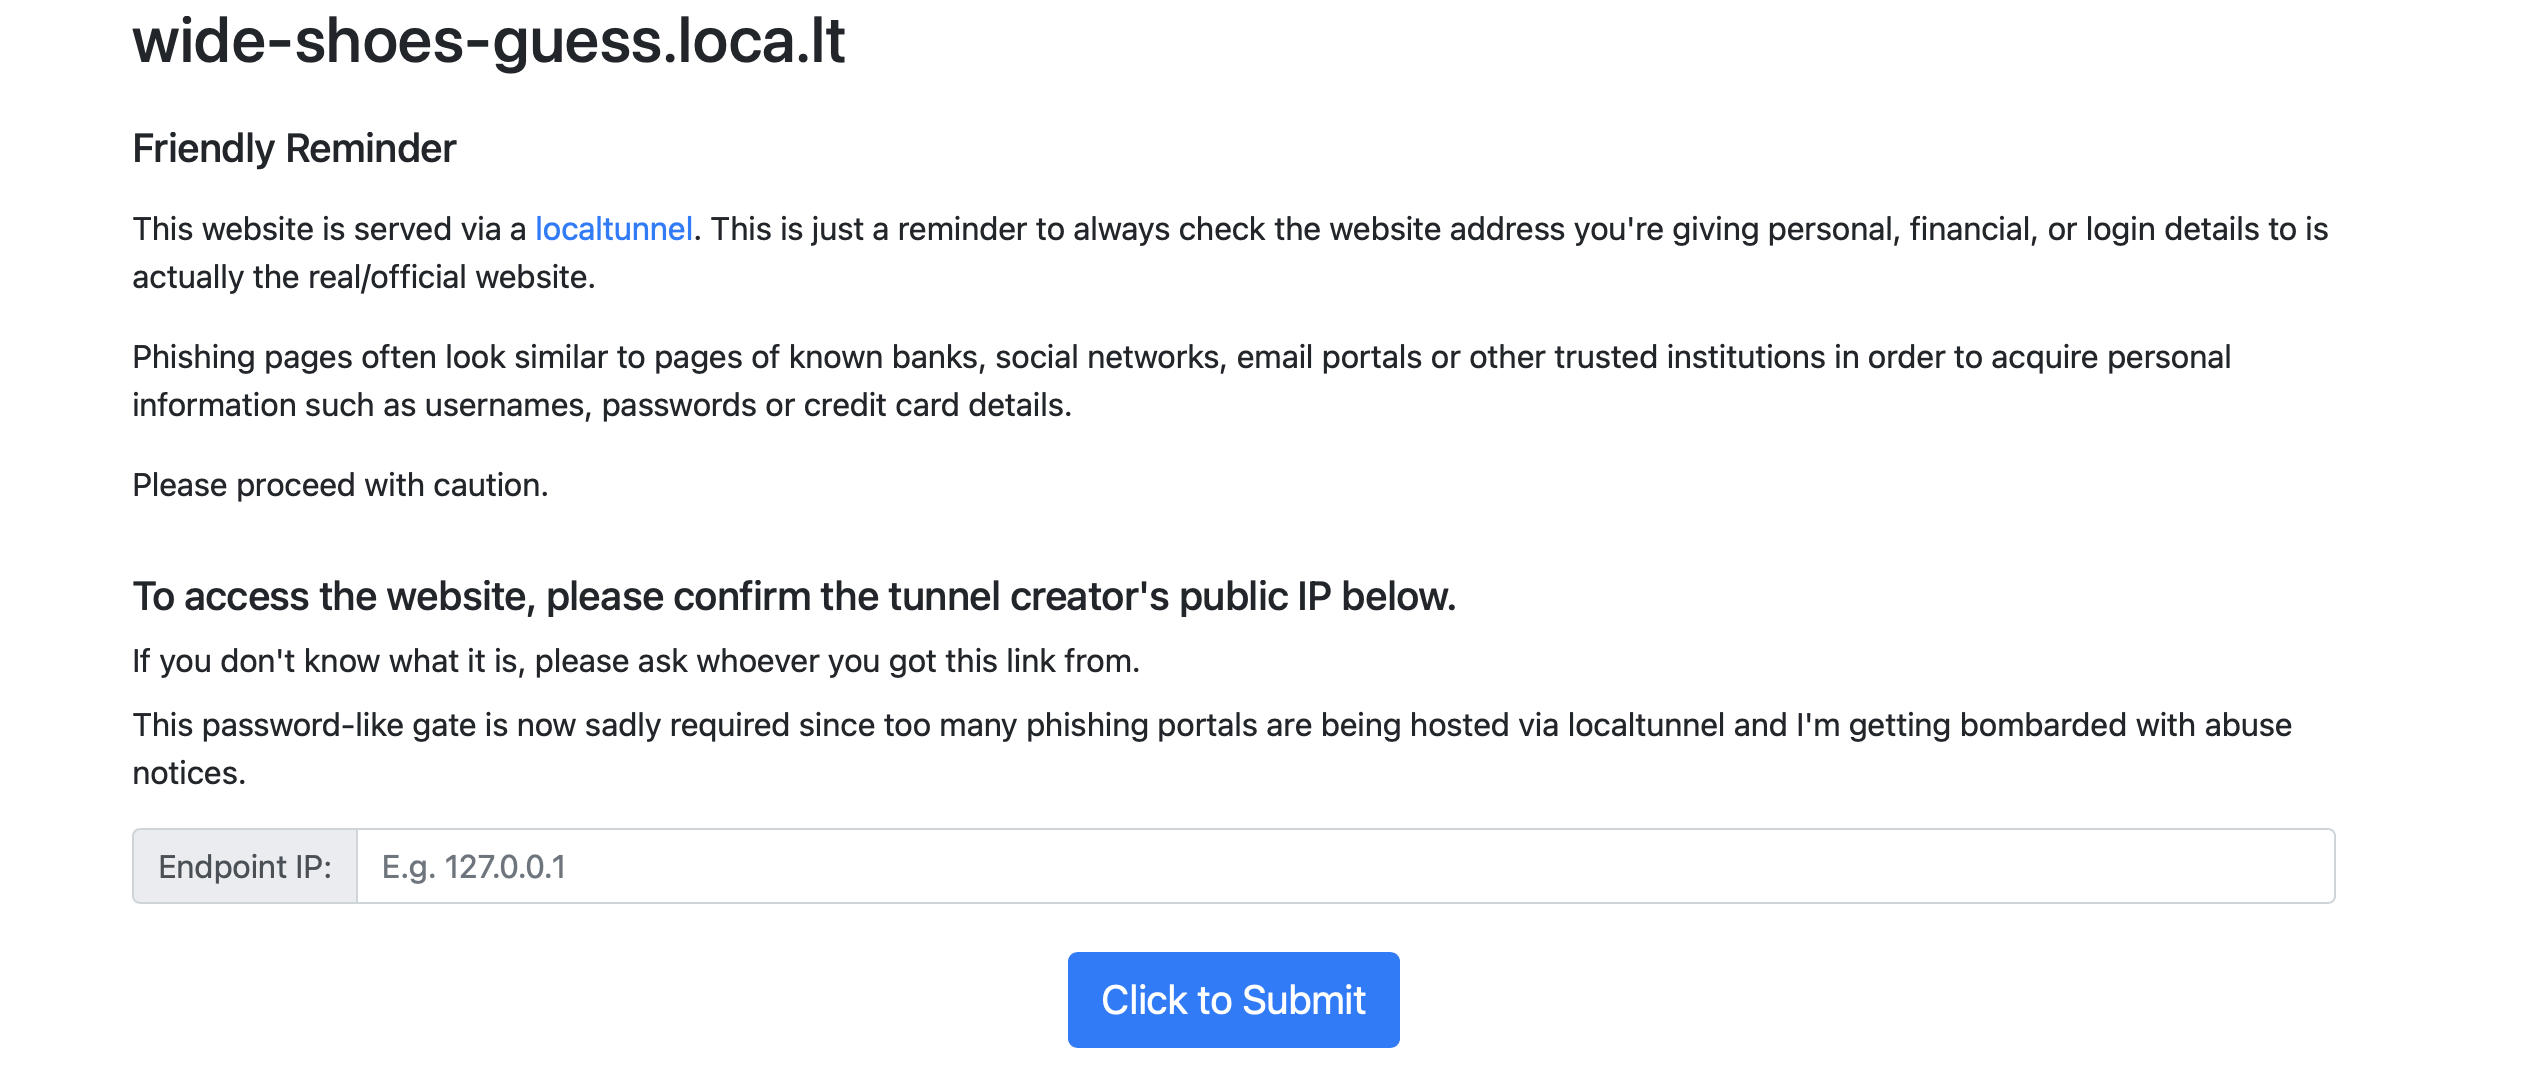

## How to write text?

In [ ]:
%%writefile app.py
import streamlit as st
st.write("Local Application")
# to write the markdown content
st.markdown("## This is my streamlit application")
st.sidebar.markdown("### this is side bar")

Overwriting app.py


In [ ]:
!streamlit run app.py &> logs.txt &
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com

Changes will be reflected right away

## How to show a table of data?

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
df = pd.read_parquet('https://raw.githubusercontent.com/pal0064/tutorials/master/streamlit_tutorial/housing_data_with_lat_long.parquet')
st.write(df)

Overwriting app.py


In [ ]:
!streamlit run app.py &> logs.txt &
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com

## How to add upload file functionality?

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd

st.title('st.file_uploader')
st.subheader('Input CSV')
uploaded_file = st.file_uploader("Choose a file",type=['csv'])

if uploaded_file is not None:
  df = pd.read_csv(uploaded_file)
  st.subheader('DataFrame')
  st.write(df)
  st.subheader('Descriptive Statistics')
  st.write(df.describe())
else:
  st.info('☝️ Upload a CSV file')

Overwriting app.py


In [ ]:
!streamlit run app.py &> logs.txt &
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com

## How to add a submit button?

In [ ]:
%%writefile app.py
import streamlit as st

st.header('st.button')

def button_callback():
    st.write('Goodbye')

st.button('Say hello',on_click = button_callback)


Overwriting app.py


In [ ]:
!streamlit run app.py &> logs.txt &
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com

## How to add filters ?

### Sliders

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
data = pd.read_parquet('https://raw.githubusercontent.com/pal0064/tutorials/master/streamlit_tutorial/housing_data_with_lat_long.parquet',columns= ['zip','period_begin','period_end','county','median_sale_price', 'homes_sold', 'inventory','irs_estimated_population','longitude','latitude'])
data = data.dropna()
data['period_begin'] = pd.to_datetime(data['period_begin'])
data['period_end'] = pd.to_datetime(data['period_end'])
int_columns = ['median_sale_price', 'homes_sold', 'inventory', 'irs_estimated_population']
data[int_columns] = data[int_columns].astype(float)
data = data[data['median_sale_price']>=150000]
value = st.slider("Max Price", min_value = data['median_sale_price'].min( ),max_value = data['median_sale_price'].max( ),)
data  = data[ data['median_sale_price'] <= value]
st.write(data)

In [ ]:
!streamlit run app.py &> logs.txt &
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com

### Selectbox and Multiselect

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
data = pd.read_parquet('https://raw.githubusercontent.com/pal0064/tutorials/master/streamlit_tutorial/housing_data_with_lat_long.parquet',columns= ['zip','period_begin','period_end','county','median_sale_price', 'homes_sold', 'inventory','irs_estimated_population','longitude','latitude'])
data = data.dropna()
data['period_begin'] = pd.to_datetime(data['period_begin'])
data['period_end'] = pd.to_datetime(data['period_end'])
int_columns = ['median_sale_price', 'homes_sold', 'inventory', 'irs_estimated_population']
data[int_columns] = data[int_columns].astype(float)
data = data[data['median_sale_price']>=150000]
st.sidebar.header("Filters")
select_by = st.sidebar.selectbox("Select Location filter:",['County','Zip'])
if select_by == 'County':
    selected_counties = st.sidebar.multiselect("Select Counties:", data['county'].unique(),default=['Pima County'])
    filtered_data = data[data['county'].isin(selected_counties)]
elif select_by =='Zip':
    selected_zip = st.sidebar.multiselect("Select Zip Code:", data['zip'].unique(),default=[85719])
    filtered_data = data[data['zip'].isin(selected_zip)]
value = st.sidebar.slider("Max Price", min_value = data['median_sale_price'].min( ),max_value = data['median_sale_price'].max( ),)
filtered_data  = filtered_data[ filtered_data['median_sale_price'] <= value]
st.write(filtered_data)

In [ ]:
!streamlit run app.py &> logs.txt &
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com

## How to add plots ?

## Matplotlib

In [ ]:
%%writefile app.py
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
arr = np.random.normal(1, 1, size=100)
fig, ax = plt.subplots()
ax.hist(arr, bins=20)
st.pyplot(fig)

In [ ]:
!streamlit run app.py &> logs.txt &
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com

### Plotly

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import plotly.figure_factory as ff

# Add histogram data
x1 = np.random.randn(200) - 2
x2 = np.random.randn(200)
x3 = np.random.randn(200) + 2

# Group data together
hist_data = [x1, x2, x3]

group_labels = ['Group 1', 'Group 2', 'Group 3']

# Create distplot with custom bin_size
fig = ff.create_distplot(
        hist_data, group_labels, bin_size=[.1, .25, .5])

# Plot!
st.plotly_chart(fig, use_container_width=True)

In [ ]:
!streamlit run app.py &> logs.txt &
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com

### Spacy

In [ ]:
%%writefile app.py
import spacy_streamlit
models = ["en_core_web_sm", "en_core_web_md"]
default_text = "Sundar Pichai is the CEO of Google."
spacy_streamlit.visualize(models, default_text)

In [ ]:
!streamlit run app.py &> logs.txt &
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com

## How to add a form ?

In [ ]:
%%writefile app.py
import streamlit as st
with st.form("my_form"):
    st.title("House Pricing Streamlit App")

    # Input features
    st.header("Input Features")

    # Input feature: Number of bedrooms
    bedrooms = st.slider("Number of Bedrooms", 1, 10, 3)

    # Input feature: Number of bathrooms
    bathrooms = st.slider("Number of Bathrooms", 1, 10, 2)

    # Input feature: Square footage
    square_footage = st.slider("Square Footage", 500, 10000, 1500)

    # Input feature: Location (Dropdown)
    locations = ["Urban", "Suburban", "Rural"]
    location = st.selectbox("Location", locations)
    submitted = st.form_submit_button("Submit")
    if submitted:
        st.write("## Input Features")
        st.write(f"Number of Bedrooms: {bedrooms}")
        st.write(f"Number of Bathrooms: {bathrooms}")
        st.write(f"Square Footage: {square_footage} sq. ft.")
        st.write(f"Location: {location}")

In [ ]:
!streamlit run app.py &> logs.txt &
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com

## How to cache things?

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
@st.cache_data()
def load_data():
    data = pd.read_parquet('https://raw.githubusercontent.com/pal0064/tutorials/master/streamlit_tutorial/housing_data_with_lat_long.parquet',columns= ['zip','period_begin','period_end','county','median_sale_price', 'homes_sold', 'inventory','irs_estimated_population','longitude','latitude'])
    data = data.dropna()
    data['period_begin'] = pd.to_datetime(data['period_begin'])
    data['period_end'] = pd.to_datetime(data['period_end'])
    int_columns = ['median_sale_price', 'homes_sold', 'inventory', 'irs_estimated_population']
    data[int_columns] = data[int_columns].astype(float)
    data = data[data['median_sale_price']>=150000]
    return data
data = load_data()
st.sidebar.header("Filters")
select_by = st.sidebar.selectbox("Select Location filter:",['County','Zip'])
if select_by == 'County':
    selected_counties = st.sidebar.multiselect("Select Counties:", data['county'].unique(),default=['Pima County'])
    filtered_data = data[data['county'].isin(selected_counties)]
elif select_by =='Zip':
    selected_zip = st.sidebar.multiselect("Select Zip Code:", data['zip'].unique(),default=[85719])
    filtered_data = data[data['zip'].isin(selected_zip)]
value = st.sidebar.slider("Max Price", min_value = data['median_sale_price'].min( ),max_value = data['median_sale_price'].max( ),)
filtered_data  = filtered_data[ filtered_data['median_sale_price'] <= value]
st.write(filtered_data)

In [ ]:
!streamlit run app.py &> logs.txt &
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com